# Deep Learning in Medicine
## BMSC-GA 4493, BMIN-GA 3007
## Homework 3: RNNs

Note 1: You can either work on HPC (recommended) or Google Colab for this homework.

Note 2: If you need to write mathematical terms, you can type your answers in a Markdown Cell via LaTex
See: <a href="https://stackoverflow.com/questions/13208286/how-to-write-latex-in-ipython-notebook">here</a> if you have issues. To see basic LaTex notation see: <a href="https://en.wikibooks.org/wiki/LaTeX/Mathematics">here</a>.


Submission instruction: Upload your final jupyter notebook file, along with any figures that you may produce, in a zipped file named **netid_hw3** on Brightspace.

**Submission deadline: Thursday April 14th 2022 11:59pm.**



# Question 1: Literature Review: LSTM for ECG Signal Classification (Total points 20 + 5 bonus points)

Read this paper:

#### Yildirim, Özal. "A novel wavelet sequence based on deep bidirectional LSTM network model for ECG signal classification." Computers in biology and medicine 96 (2018): 189-202.

https://www.sciencedirect.com/science/article/pii/S0010482518300738?casa_token=XhS9KHU_fQoAAAAA:FGE7jkAK3I7HRf1yZNl8LA2snhUo1VgyEYdL7oXP1aI3jkBoqEc3dnvGtw1FEuNzWhnlAZ5X

We are interested in understanding the task, the methods that is proposed in this publication, technical aspects of the implementation, and possible future work.

**1.1) (5 points)** After you read the full article, go back to section Materials and Method. You can find the two proposed Deep Learning architectures in the paper. Please briefly describe the model structure of one of the model, DBLSTM-WS. What are the layers, number of features input to the network and the output dimension of the model? You can ignore specifics parameters for the layers.

In the DBLSTM-WS model, the top layer is a wavelet transform based WS (wavelet sequence) layer, where a discrete wavelet transform is applied on the segmented input signals (the decomposition process is specified by a "Levels" parameter). This layer was followed by two layers of BLSTM and a dropout, flatten, and two fully connected layers (with ReLU and softmax activations applied respectively). Inputs to the initial layer were determined by the level selected for the wavelet transform (between 1 and 4). The BTLSM layers had 64 and 32 dimensions respectively, followed by fully connected layers with 128 and 5 dimensions (corresponding to the 5 classes of signal).

**1.2) (5 points)** What is the loss function for the two proposed models (same for both)? What are the evaluation criteria used by the authors for the models?

The loss function selected for the models was categorical cross entropy, which is appropriate for this multiclass classification problem. In order to assess the benefits of the addition of the WS framework, the authors first assessed classification accuracy on normal DULSTM/DBLSTM models before including the additional layer. Confusion matrices show classification accuracy for each of the 5 classes. Because of the 4-tiered structure of the WS layer, each model had to be assessed with regards to a modulation of these layers from WS1 to WS4. Training for both versions of the model was completed by the 50th epoch, with testing accuracies at each WS level exceeding 99% in all cases. A visualization of learned features showed that feature size decreased and regions were better separated in radar plots of the 5 classes, indicating that the WS layer reduces the size of the features learned by the deep LSTM networks and provides more distinguishing features. In terms of time efficiency, it was found that DBLSTM models require more time than DULSTM networks.

**1.3) (5 points)** The Wavelet Sequences (WS) layer serves as a data transformation for the input ECG sequence. Please briefly describe the details functionality of the layer. Please also describe conceptually the effect of number of layers for WS layer on the signal **(Hint: check the included figures in section 4)**.

In the WS layer, frequency sub-bands belonging to the signals were obtained for use in the classification phase. These sub-bands are presented in sequence to other layers without any additional calculation. The WS layer takes the level information so the signals can be decomposed as parameters. According to this level parameter, sequences are generated in different sub frequency bands belonging to the signals (from 1 through 4). Wavelet transform performs a down sample using two operations at every level. As the number of levels increases, the number of features of the input signal increases. WS1 provides a two-dimensional feature input while WS4 contains five-dimensional feature signals.

**1.4) (5 points)** Are there some data augmentation/regularization that authors have used? What are some techniques that could have been used but wasn't? Briefly provide some explanation of your choice.

Inherently, the WS layer reduces the size of the features learned by the deep LSTM networks, provides more distinguishing features, and performs an augmentation process for inputs so that more effective features can be learned. In terms of regularization, two dropout layers were included following the LSTM layer and first fully connected layer in order to reduce overfitting potential. Weight regularization could be used to invoke stricter penalties for misclassifications, as it seemed the more correlated classes (C1/C5 and C4/C5) tended to lead to misclassification. Batch normalization and data shuffling could aid in reducing the number of epochs required while inmproving model stability. In addition, attempting to use other optimizers may yield different results, although Adam is generally the most robust.

**1.5) (Bonus, maximum 5 points)**. What other architectures would you try? For maximum point, name one architecture, briefly explain your motivation for it and in a few sentences explain why the proposed changes might work better. Do some literature review on the application of such architecture in the medical field.

One option is to use a modulation of the CNN framework - a one dimensional CNN network can be used to process a one-dimensional time series with uniform interval sampling. Average pooling could be used rather than max pooling in order to preserve the feature scale - this would be in addition to standard dropout and fully connected layers. One extension of this would be to use a dilated causal convolution model - causal convolution can solve the problem of different input and output time steps in CNNs and future information leakage. Dilated convolution can widen the receptive field of the convolution kernel and reduce the network depth to a certain extent. The dilation factor can increase the size of the receptive field, allowing access to a broad range of history conducive to time series signals. This technique is employed in the following paper, and may lead to reduced runtime as well: https://www.hindawi.com/journals/cmmm/2021/6627939/

# Question 2: Literature Review: Multi-Channel Fusion LSTM (20 points)

Read this paper: 


#### Liu, S., Wang, X., Xiang, Y., Xu, H., Wang, H., & Tang, B. (2022). Multi-channel Fusion LSTM for Medical Event Prediction using HERs. 

https://www.sciencedirect.com/science/article/pii/S1532046422000272?casa_token=ymhReMXUX2kAAAAA:pVqghdvoabg5Rkz4IKInVLeiMQNfc3nHc9Y71voIvdD7Ba3yfWOY5ME9Yx97mICi04IREy5b

In this paper, the authors propose two models with multi-channel fusion of LSTM to handle heterogeneous electronic medical records. We are interested in understanding how different channels of input signals are processed and embedded with LSTM modules, and subsequently used for downstream tasks.


**2.1) (10 points)** After reading the paper, focus on Secion 3.2. Describe, with relevant formulas, how the fusion module works for an individual auxillary channel for Single-Belt Fusion model and Multi-Belt Fusion model. Please also conceptually describe the difference of the fusion modules in the two models.

In this problem, there were 4 different prediction tasks (medication, lab test, procedure, diagnosis) which the model could be modulated for, and two caveats were heterogeneity of EHRs and temporal irregularity between visits, which tend to bottleneck performance of baseline LSTMs. Correlation was modeled between the primary channel (the prediction task of interest) and the remaining "auxiliary" channels using a gated task-wise fusion module which selected how much information was transferred to the primary channel. Effects of temporal irregularity were included as a pseudo auxiliary channel in addition to the other medical events. 

Given the primary channel and N auxiliary channels (N-1 other medical events + 1 temporal interval), Single-Belt Fusion (SBF) fuses channel information on a single belt: the primary channel and all auxiliary channels share one LSTM unit, and information from all auxiliary channels is projected to the primary channel using a Fusion module, with each message passing through the primary channel belt. The Fusion module can be written as:
$v_t^{'k} = 1/ln(e+v_t^k)$ for temporal interval channel and $tanh(W_kv_t^k+b_k)$ for other auxiliary channels, where W refers to weight and b to bias. First, the Fusion module selects information from an auxiliary channel according to the history information, then the selected info is collected from all auxiliary channels (MLP) and input into the LSTM cell.

Multi-Belt Fusion (MBF) fuses channel information across multiple belts, where each auxiliary channel has a separate belt. First, each auxiliary channel is individually fused with the primary channel, and then all are combined through an MLP. Unlike SBF, MBF first uses an individual belt for each auxiliary channel with the same fusion module to select information from the auxiliary channel according to the history information, and then it combines the information from all channels after the LSTM cell.

**2.2) (5 points)** Consider the Multi-Belt Fusion model. Briefly describe the model structure. Consider that the model is used for a prediction downstream task. Please also describe how the MBF embedding is used for the prediction task, along with the loss function used in the study **(hint: check Section 3.3)**.

in the MBF, there are multiple belts to accomodate the auxiliary channels and make it possible to perform fusion individually with the primary channel based on the history information. These are fed into LSTM blocks, whose outputs can be combined with the primary channel through an MLP. Patient demographic information (S) can be incorporated into the model such that there is an output from: $v_T^{'} = relu(MLP(W_{static}S + b_{static}) + h_T$ which can be passed through a sigmoid function to generate predictions regarding whether a medical event will appear at the next visit (T+1). Cross-entropy loss is used as the objective function for optimization, with L2 regularization employed.

**2.3) (5 points)** The authors experimented the model using two datasets. Which criteria are used to evaluate the models? What is the best model according to the evaluation criteria?

In order to evaluate performance, AUROC, AUPRC, and top-k recall were used based on standards in literature. These metrics were reported using each medical event as the primary channel. Both proposed models (MCF-LSTM-SBF and MCF-LSTM-MBF) outperform all other benchmarked models (such as DeLSTM, T-LSTM, etc.), mainly due to their ability to learn dynamic temporal dependencies and take advantage of correlations amongst channels. Between the two models, MCF-LSTM-MBF is better than MCF-LSTM-SBF in most cases.

# Question 3 - Programming: Build Classifiers on Medical Transcriptions - Recurrent Neural Networks and Self Attention(60 points + 10 bonus points)

Let's build some models now. In this homework, we will focus on a dataset which has around 5000 medical transcriptions and the corresponding medical specialty. The data is available <a href="https://www.kaggle.com/tboyle10/medicaltranscriptions">here</a>.

Here, we will focus on predicting top few classes of medical specialty, from the transcription text. <a href="https://github.com/nyumc-dl/BMSC-GA-4493-Spring2022/tree/main/lab6">Lab 6</a> will be very useful here.

**If you are working on Google Colab, please change the working directory path and run the next cell.**

In [3]:
# Run this cell if you are working on Google Colab
from google.colab import drive
drive.mount('/content/drive')

os.chdir('drive/MyDrive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**3.1) (5 points)** Read the csv using Pandas. Select the top 6 frequent classes ('medical_specialty') from the data. Only keep the rows that belong to one of these classes in your data. Which classes are there, and how many rows do you have after this filteration?

In [2]:
import torch
import re
import pandas as pd
import numpy as np
import matplotlib, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from torch import nn
from torch.utils.data import Dataset, DataLoader, TensorDataset, RandomSampler
from torchvision import transforms, datasets, models
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence
from torch.nn import GRU
import torch.nn.functional as F
import torch.optim as optim
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from collections import Counter
import os
import time
import random

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
# If there's a GPU available...
if torch.cuda.is_available():    
    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")
print("Device being used: %s" %device)

There are 1 GPU(s) available.
We will use the GPU: Tesla T4
Device being used: cuda


In [5]:
mt = pd.read_csv('mtsamples.csv', index_col = 0)
print(len(mt))
mt.head()

4999


,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [6]:
count = Counter(mt.medical_specialty).most_common()[0:6]
print('Most frequent medical specialties:')
count

Most frequent medical specialties:


[(' Surgery', 1103),
 (' Consult - History and Phy.', 516),
 (' Cardiovascular / Pulmonary', 372),
 (' Orthopedic', 355),
 (' Radiology', 273),
 (' General Medicine', 259)]

In [7]:
cols = [' Surgery',' Consult - History and Phy.',' Cardiovascular / Pulmonary','Orthopedic',' Radiology',' General Medicine']
data = mt[mt.medical_specialty.isin(cols)][['medical_specialty','transcription']]
print(len(data))
data.head()

2523


,medical_specialty,transcription
3,Cardiovascular / Pulmonary,"2-D M-MODE: , ,1. Left atrial enlargement wit..."
4,Cardiovascular / Pulmonary,1. The left ventricular cavity size and wall ...
7,Cardiovascular / Pulmonary,"2-D ECHOCARDIOGRAM,Multiple views of the heart..."
9,Cardiovascular / Pulmonary,"DESCRIPTION:,1. Normal cardiac chambers size...."
11,Cardiovascular / Pulmonary,"2-D STUDY,1. Mild aortic stenosis, widely calc..."


In [8]:
le = LabelEncoder()
le.fit(data.medical_specialty)
data.medical_specialty = le.transform(data.medical_specialty)

After filtration, the number of rows is cut almost in half, from 4999 to 2523

**3.2) (5 points)** Now convert your data into train, test and validation set. Shuffle the rows, and split them with ratios of (train:60%, valid:20%, test:20%). Set the random seed to 2022. Please follow the steps from https://pytorch.org/docs/stable/notes/randomness.html to set all the seeds to make the results reproducible.

In [ ]:
torch.manual_seed(2022)
random.seed(2022)

In [9]:
data = data[data.transcription.notnull()]
full_data, test_data = train_test_split(data, test_size = 0.20, shuffle = True, random_state = 42)
train_data, val_data = train_test_split(full_data, test_size = 0.25, shuffle = True, random_state = 42)

train_data.index = np.arange(len(train_data))
val_data.index = np.arange(len(val_data))
test_data.index = np.arange(len(test_data))

**3.3) (5 points)** Create a function to create vocabulary from the training data. Only use the transcription column for this. Use the tokenization scheme of your choice and create a vocabulary.

In [9]:
train_data['transcription']

0       TITLE OF OPERATION:,  Mediastinal exploration ...
1       MALE PHYSICAL EXAMINATION,Eye:  Eyelids normal...
2       PREOPERATIVE DIAGNOSIS (ES):, Osteoarthritis, ...
3       PREOPERATIVE DIAGNOSES:,1.  Chronic renal fail...
4                                           INDICATIONS:,
                              ...                        
1498    PREOPERATIVE DIAGNOSIS,Mammary hypertrophy wit...
1499    INDICATION:,  Coronary artery disease, severe ...
1500    CHIEF COMPLAINT: , Iron deficiency anemia.,HIS...
1501    EXAM: , Left Heart Catheterization,REASON FOR ...
1502    CC: ,Gait difficulty.,HX: ,This 59 y/o RHF was...
Name: transcription, Length: 1503, dtype: object

In [10]:
UNK = "<UNK>"
PAD = "<PAD>"

def build_vocab(sentences, min_count=3, max_vocab=None):
    """
    Build vocabulary from sentences (list of strings)
    """
    # keep track of the number of appearance of each word
    word_count = Counter()
    
    for sentence in sentences:
        # Regular expression operations: [] (indicate a set of characters), 
        sentence = re.sub('[\\(\[#.!?,\'\/\])0-9]', ' ', str(sentence))
        word_count.update(word_tokenize(sentence.lower()))
    
    vocabulary = list([w for w in word_count if word_count[w] > min_count]) + [UNK, PAD]
    indices = dict(zip(vocabulary, range(len(vocabulary))))

    return vocabulary, indices

vocabulary, vocab_indices = build_vocab(train_data['transcription'])

print(len(vocabulary))

8422


**3.4) (10 points)** Write a dataloader and collate function so that we can begin to train our networks! You can choose to use either the complete transcription text or fix a maximum length of transcription text as input for your model.

In [93]:
class Dataset(Dataset):
    def __init__(self, vocab_index, df, label = 'medical_specialty'):
        self.vocab_index = vocab_index
        self.df = df
        self.label = label
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, key):
        sentence = self.df.loc[key, 'transcription']
        sentence = re.sub('[\\(\[#.!?,\'\/\])0-9]', ' ', str(sentence))
        token_indices = np.array([self.vocab_index[word] if word in self.vocab_index else self.vocab_index['<UNK>'] for word in word_tokenize(sentence.lower())])
        return (torch.tensor(token_indices) , self.df.loc[key, self.label])


def pad_collate(batch):
    (xx, yy) = zip(*batch)
    x_lens = [len(x) for x in xx]
    
    # I want to    eat an     apple
    # I am   going to  sleep  PAD  
    # batch_first: output will be in B x T x * if True, or in T x B x * otherwise
    xx_pad = pad_sequence(xx, batch_first=True, padding_value=len(vocabulary)-1)

    return torch.as_tensor(xx_pad), torch.as_tensor(x_lens), torch.LongTensor(yy)
    

BATCH_SIZE = 32
# shuffle: set to True to have the data reshuffled at every epoch
train_loader = DataLoader(Dataset(vocab_indices, train_data),
                          batch_size=BATCH_SIZE,
                          shuffle=True,
                          collate_fn = pad_collate)
val_loader = DataLoader(Dataset(vocab_indices, val_data),
                          batch_size=BATCH_SIZE,
                          shuffle=True,
                          collate_fn = pad_collate)
test_loader = DataLoader(Dataset(vocab_indices, test_data),
                         batch_size=BATCH_SIZE,
                         shuffle=True,
                         collate_fn = pad_collate)

In [12]:
sample_input = next(iter(train_loader))
print("Padded sequence".center(80, '*'))
print(sample_input[0][0])
print("Length of sequence".center(80, '*'))
print(sample_input[1])
print("Label of sequence".center(80, '*'))
print(sample_input[2])

********************************Padded sequence*********************************
tensor([ 355,   62,    3,  ..., 8421, 8421, 8421])
*******************************Length of sequence*******************************
tensor([1183, 1582,  162,  628,  367,  567,  452,  232,  346,  433,  571,  432,
         158,  367,  286,  580,  161,   11,  247,  167,  253,  693,  412,  549,
         671,  232,  987,  656,  610,  599,  604, 1155])
*******************************Label of sequence********************************
tensor([4, 0, 4, 1, 2, 0, 1, 4, 4, 0, 3, 1, 3, 1, 4, 4, 0, 1, 4, 3, 4, 4, 4, 4,
        0, 3, 4, 1, 4, 1, 4, 0])


**3.5) (10 points)** Now you are ready to build your sequence classification model!

First, Build a simple GRU model that takes as input the text indices from the vocabulary, and ends with a softmax over total number of classes. Use the embedding and hidden dimension of your choice. 

**Please train your model to reach at the least 50% accuracy on the test set.**

At each epoch, compute and print **Average Cross Entropy loss** and **Accuracy** on both **train and validation set** 

Plot your validation and train loss over different epochs. 

Plot your validation and train accuracies over different epochs. 

Finally print accuracy on the test set.

In [19]:
class GRU(nn.Module):
    
    def __init__(self, hidden_dim, output_dim, vocab_size, embedding_dim):
        super(GRU, self).__init__()
        self.emb = nn.Embedding(vocab_size, embedding_dim, padding_idx=vocab_size-1)
        self.hidden_dim = hidden_dim
        self.gru = nn.GRU(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.softmax = nn.Softmax()
    
    def forward(self, x, x_len):
        x = self.emb(x)
        _, last_hidden = self.gru(pack_padded_sequence(x, x_len.cpu(), batch_first=True, enforce_sorted=False))
        out = self.softmax(self.fc(last_hidden.view(-1, self.hidden_dim)))
        
        return out

In [40]:
def train(model, train_loader=train_loader, val_loader=val_loader, learning_rate=0.005, num_epoch=10):
    train_acc, val_acc, train_loss, val_loss = {},{},{},{}
    best_acc = 0
    # Training steps
    start_time = time.time()
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=10**(-5))
    for epoch in range(num_epoch):
        correct, total = 0,0
        train_pred, train_truth = [],[]
        model.train()
        for i, (data, data_len, labels) in enumerate(train_loader):
            data, data_len, labels = data.to(device), data_len.to(device), labels.to(device)
            outputs = model(data, data_len)
            model.zero_grad()
            loss = loss_fn(outputs.squeeze(), labels)
            pred = outputs.data.max(-1)[1]
            train_pred += list(pred.cpu().numpy())
            train_truth += list(labels.cpu().numpy())
            total += labels.size(0)
            correct += (pred == labels).sum()
            loss.backward()
            optimizer.step()
        train_loss[epoch] = loss.item()
        train_acc[epoch] = correct / total
        print('Train set | epoch: {:3d} | Loss: {:6.4f} | Acc: {:6.4f}'.format(epoch, train_loss[epoch], train_acc[epoch]))
                
        # Validation steps
        correct, total = 0,0
        val_pred, val_truth = [],[]
        model.eval()
        with torch.no_grad():
            for i, (data, data_len, labels) in enumerate(val_loader):
                data, data_len, labels = data.to(device), data_len.to(device), labels.to(device)
                outputs = model(data, data_len)
                loss = loss_fn(outputs.squeeze(), labels)
                pred = outputs.data.max(-1)[1]
                val_pred += list(pred.cpu().numpy())
                val_truth += list(labels.cpu().numpy())
                total += labels.size(0)
                correct += (pred == labels).sum()
            val_loss[epoch] = loss.item()
            val_acc[epoch] = correct / total
            if val_acc[epoch] > best_acc:
                best_acc = val_acc[epoch]
                best_model_wts = model.state_dict()
            print('Val set | epoch: {:3d} | Loss: {:6.4f} | Acc: {:6.4f}'.format(epoch, val_loss[epoch], val_acc[epoch]))
            elapse = time.strftime('%H:%M:%S', time.gmtime(int((time.time() - start_time))))
            print('Time elapse: {:>9}'.format(elapse))
    model.load_state_dict(best_model_wts)
    return model, train_acc, val_acc, train_loss, val_loss

In [15]:
def evaluate(model, test_loader=test_loader):
    correct, total = 0,0
    test_pred, test_truth = [],[]
    model.eval()
    with torch.no_grad():
        for i, (data, data_len, labels) in enumerate(test_loader):
            data, data_len, labels = data.to(device), data_len.to(device), labels.to(device)
            outputs = model(data, data_len)
            pred = outputs.data.max(-1)[1]
            test_pred += list(pred.cpu().numpy())
            test_truth += list(labels.cpu().numpy())
            total += labels.size(0)
            correct += (pred == labels).sum()
        acc = correct / total
    print('Test set | Acc: {:6.4f}'.format(acc))

In [ ]:
gru_model = GRU(20, 6, len(vocabulary), 10).to(device)
train(gru_model)

C:\Users\sanjs\AppData\Local\Temp/ipykernel_13764/382088191.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.softmax(self.fc(last_hidden.view(-1, self.hidden_dim)))


Train set | epoch:   0 |     20/    47 batches | Loss: 1.7869
Train set | epoch:   0 |     40/    47 batches | Loss: 1.7569
Test set | Accuracy: 42.2488 | time elapse:  00:05:14
Train set | epoch:   1 |     20/    47 batches | Loss: 1.7188
Train set | epoch:   1 |     40/    47 batches | Loss: 1.5691
Test set | Accuracy: 43.1138 | time elapse:  00:10:20
Train set | epoch:   2 |     20/    47 batches | Loss: 1.5026
Train set | epoch:   2 |     40/    47 batches | Loss: 1.6997
Test set | Accuracy: 43.1138 | time elapse:  00:14:59
Train set | epoch:   3 |     20/    47 batches | Loss: 1.5473
Train set | epoch:   3 |     40/    47 batches | Loss: 1.4966
Test set | Accuracy: 43.1138 | time elapse:  00:19:42
Train set | epoch:   4 |     20/    47 batches | Loss: 1.5557
Train set | epoch:   4 |     40/    47 batches | Loss: 1.5628
Test set | Accuracy: 43.1803 | time elapse:  00:23:53
Train set | epoch:   5 |     20/    47 batches | Loss: 1.5207
Train set | epoch:   5 |     40/    47 batches |

In [20]:
torch.manual_seed(2022)
gru_model = GRU(30, 5, len(vocabulary), 10).to(device)
model, train_acc, val_acc, train_loss, val_loss = train(gru_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


Train set | epoch:   0 | Loss: 1.4656 | Acc: 0.4125
Val set | epoch:   0 | Loss: 1.4457 | Acc: 0.4502
Time elapse:  00:00:06
Train set | epoch:   1 | Loss: 1.4828 | Acc: 0.4731
Val set | epoch:   1 | Loss: 1.3607 | Acc: 0.4502
Time elapse:  00:00:13
Train set | epoch:   2 | Loss: 1.4122 | Acc: 0.5635
Val set | epoch:   2 | Loss: 1.1408 | Acc: 0.5916
Time elapse:  00:00:19
Train set | epoch:   3 | Loss: 1.2288 | Acc: 0.6248
Val set | epoch:   3 | Loss: 1.2264 | Acc: 0.6255
Time elapse:  00:00:25
Train set | epoch:   4 | Loss: 1.2793 | Acc: 0.6301
Val set | epoch:   4 | Loss: 1.3588 | Acc: 0.6175
Time elapse:  00:00:32
Train set | epoch:   5 | Loss: 1.1670 | Acc: 0.6274
Val set | epoch:   5 | Loss: 1.4437 | Acc: 0.6255
Time elapse:  00:00:38
Train set | epoch:   6 | Loss: 1.3854 | Acc: 0.6387
Val set | epoch:   6 | Loss: 1.2252 | Acc: 0.6295
Time elapse:  00:00:45
Train set | epoch:   7 | Loss: 1.1697 | Acc: 0.6427
Val set | epoch:   7 | Loss: 1.2713 | Acc: 0.6633
Time elapse:  00:00:51


In [21]:
evaluate(model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


Test set | Acc: 0.6713


In [46]:
epochs = range(10)
trainacc, valacc = [],[]
for i in epochs:
  trainacc.append(train_acc[i].to('cpu').numpy())
  valacc.append(val_acc[i].to('cpu').numpy())
trainloss = list(train_loss.values())
valloss = list(val_loss.values())

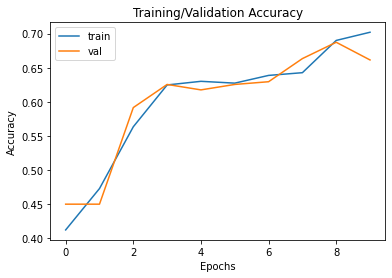

In [49]:
plt.plot(epochs, trainacc, label = 'train')
plt.plot(epochs, valacc, label = 'val')
plt.title('Training/Validation Accuracy'), plt.xlabel('Epochs'), plt.ylabel('Accuracy')
plt.legend()
plt.show()

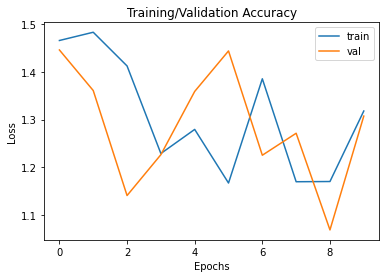

In [48]:
plt.plot(epochs, trainloss, label = 'train')
plt.plot(epochs, valloss, label = 'val')
plt.title('Training/Validation Accuracy'), plt.xlabel('Epochs'), plt.ylabel('Loss')
plt.legend()
plt.show()

**3.6) (25 points)** Now, let's finetune a sequence classification model based on BERT. Please install the Huggingface's Transformers library for this. Use the Pretrained 'bert-base-uncased' model for this problem. Please use the BERT tokenizer from the pretrained built for 'bert-base-uncased' model . Use the AdamW optimizer from the transformers library for optimization. Remember BERT uses Attention masks for input so you need to create a separate dataloader for BERT. Please keep in mind that BERT can handle maximum of 512 tokens.

**Please finetune the model so that it reaches at least 60% accuracy on the test set.**

The rest of your experimental setting should be the same as 3.5:

At each epoch, compute and print **Average Cross Entropy loss** and **Accuracy** on both **train and validation set** 

Plot your validation and train loss over different epochs. 

Plot your validation and train accuracies over different epochs. 

Finally print accuracy on the test set.

In [10]:
import transformers
from transformers import BertTokenizer, BertModel

In [11]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bertmodel = BertModel.from_pretrained("bert-base-uncased").to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [12]:
def encode(data, tokenizer):
    input_ids = []
    attention_mask = []
    for text in data:
        tokenized_text = tokenizer.encode_plus(text,max_length=512,add_special_tokens=True,padding='max_length',return_attention_mask=True,truncation=True)
        input_ids.append(tokenized_text['input_ids'])
        attention_mask.append(tokenized_text['attention_mask'])
    return torch.tensor(input_ids, dtype=torch.long), torch.tensor(attention_mask, dtype=torch.long)

In [13]:
def get_batches(df, tokenizer, batch_size):
    x = list(df.transcription.values)
    for i in x:
        i = re.sub('[\\(\[#.!?,\'\/\])0-9]', ' ', str(i))
    y_indices = df.medical_specialty

    y = torch.tensor(list(y_indices), dtype=torch.long)
    input_ids, attention_mask = encode(x, tokenizer)
    tensor_dataset = torch.utils.data.TensorDataset(input_ids, attention_mask, y)
    tensor_randomsampler = torch.utils.data.RandomSampler(tensor_dataset)
    tensor_dataloader = DataLoader(tensor_dataset, sampler=tensor_randomsampler, batch_size=batch_size)
    return tensor_dataloader

In [22]:
BATCH_SIZE = 10
train_loader_bert = get_batches(train_data, tokenizer, batch_size=BATCH_SIZE)
val_loader_bert = get_batches(val_data, tokenizer, batch_size=BATCH_SIZE)
test_loader_bert = get_batches(test_data, tokenizer, batch_size=BATCH_SIZE)

In [15]:
def train_bert(model, train_loader=train_loader_bert, val_loader=val_loader_bert, learning_rate=0.005, num_epoch=10):
    train_acc, val_acc, train_loss, val_loss = {},{},{},{}
    best_acc = 0
    # Training steps
    start_time = time.time()
    loss_fn = nn.CrossEntropyLoss()
    optimizer = transformers.AdamW(model.parameters(),lr=learning_rate, weight_decay = 10**(-5))#, correct_bias=False)
    #torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=10**(-5))
    for epoch in range(num_epoch):
        correct, total = 0,0
        train_pred, train_truth = [],[]
        model.train()
        #for i, batch_tuple in enumerate(train_loader):
        #    batch_tuple = (t.to(device) for t in batch_tuple)
        #    input_id, attention_mask, labels = batch_tuple
        for i, (input_id, attention_mask, labels) in enumerate(train_loader):
            input_id, attention_mask, labels = input_id.to(device), attention_mask.to(device), labels.to(device)
            outputs = model(input_ids=input_id, attention_mask=attention_mask)
            model.zero_grad()
            loss = loss_fn(outputs.squeeze(), labels)
            pred = outputs.input_id.max(-1)[1]
            train_pred += list(pred.cpu().numpy())
            train_truth += list(labels.cpu().numpy())
            total += labels.size(0)
            correct += (pred == labels).sum()
            loss.backward()
            optimizer.step()
        train_loss[epoch] = loss.item()
        train_acc[epoch] = correct / total
        print('Train set | epoch: {:3d} | Loss: {:6.4f} | Acc: {:6.4f}'.format(epoch, train_loss[epoch], train_acc[epoch]))
                
        # Validation steps
        correct, total = 0,0
        val_pred, val_truth = [],[]
        model.eval()
        with torch.no_grad():
            for i, (input_id, attention_mask, labels) in enumerate(val_loader):
                input_id, attention_mask, labels = input_id.to(device), attention_mask.to(device), labels.to(device)
                outputs = model(input_id, attention_mask)
                loss = loss_fn(outputs.squeeze(), labels)
                pred = outputs.input_id.max(-1)[1]
                val_pred += list(pred.cpu().numpy())
                val_truth += list(labels.cpu().numpy())
                total += labels.size(0)
                correct += (pred == labels).sum()
            val_loss[epoch] = loss.item()
            val_acc[epoch] = correct / total
            if val_acc[epoch] > best_acc:
                best_acc = val_acc[epoch]
                best_model_wts = model.state_dict()
            print('Val set | epoch: {:3d} | Loss: {:6.4f} | Acc: {:6.4f}'.format(epoch, val_loss[epoch], val_acc[epoch]))
            elapse = time.strftime('%H:%M:%S', time.gmtime(int((time.time() - start_time))))
            print('Time elapse: {:>9}'.format(elapse))
    model.load_state_dict(best_model_wts)
    return model, train_acc, val_acc, train_loss, val_loss

In [ ]:
def evaluate(model, test_loader=test_loader):
    correct, total = 0,0
    test_pred, test_truth = [],[]
    model.eval()
    with torch.no_grad():
        for i, (input_id, attention_mask, labels) in enumerate(test_loader):
            input_id, attention_mask, labels = input_id.to(device), attention_mask.to(device), labels.to(device)
            outputs = model(input_id, attention_mask)
            pred = outputs.data.max(-1)[1]
            test_pred += list(pred.cpu().numpy())
            test_truth += list(labels.cpu().numpy())
            total += labels.size(0)
            correct += (pred == labels).sum()
        acc = correct / total
    print('Test set | Acc: {:6.4f}'.format(acc))

In [23]:
bert_model, train_acc_bert, val_acc_bert, train_loss_bert, val_loss_bert = train_bert(bertmodel)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


RuntimeError: ignored

In [ ]:
evaluate(bertmodel)

**3.7) (Bonus maximum 10 points)** List 5 examples on the test set that BERT misclassified. Describe reasons identified for misclassification.